# Wizualizacja niepodobieństwa + dendrogram

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [1]:
import scipy.spatial.distance as dst
from sklearn.manifold import MDS

In [4]:
chemia = pd.read_csv("data/chemia.csv",index_col="Stanowisko")
dists = dst.pdist(chemia)
coords = MDS(dissimilarity='precomputed',normalized_stress='auto').fit_transform(dst.squareform(dists))
colors = ["lavender","lightblue","bisque","indianred","whitesmoke","dimgrey","indigo"]

## Skalowanie wielowymiarowe

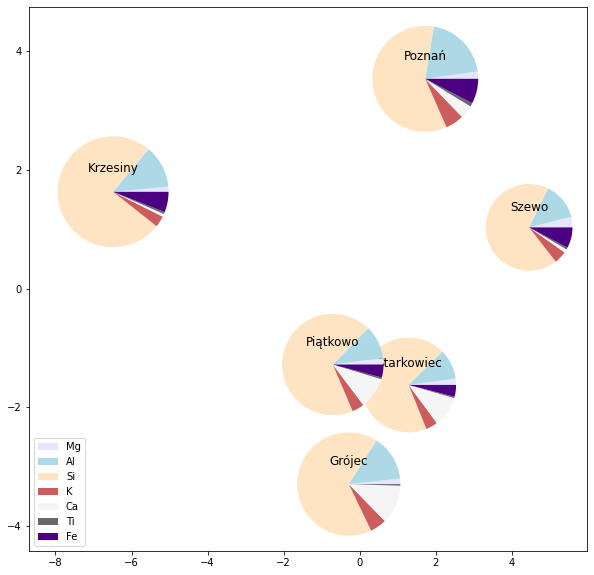

In [8]:
chemia_dist = chemia.copy()
chemia_dist['X'] = coords[:,0]
chemia_dist['Y'] = coords[:,1]

X_span = chemia_dist.X.max()-chemia_dist.X.min()
Y_span = chemia_dist.Y.max()-chemia_dist.Y.min()

scale = chemia_dist.iloc[:,:-2].sum(axis=1).max()/max(X_span,Y_span)

fig,ax = plt.subplots(figsize=(10,10))
for name,row in chemia_dist.iterrows():
    size = row[:-2].sum()/(scale*3)
    axx = ax.inset_axes([row.X-size/2,row.Y-size/2,size,size],transform=ax.transData)
    axx.set_title(name,y=0.6)
    patches, texts = axx.pie(row[:-2],colors=colors)

ax.set_xlim(chemia_dist.X.min()*scale/3,chemia_dist.X.max()*scale/3)
ax.set_ylim(chemia_dist.Y.min()*scale/3,chemia_dist.Y.max()*scale/3)
ax.legend(patches,chemia_dist.columns[:-2],loc='lower left')


## Dendrogram

In [9]:
from scipy.cluster.hierarchy import dendrogram,linkage,set_link_color_palette

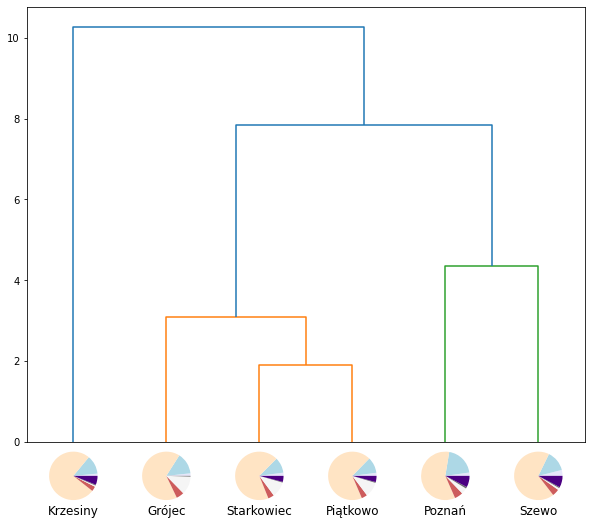

In [12]:

link = linkage(dists,"ward")
fig,ax = plt.subplots(figsize=(10,8))
dendr = dendrogram(link,ax=ax,color_threshold=5,no_labels=True)
labels = dendr['leaves']

x0 = 1.5
y = -1.6 # poniżej osi
width = 7 # w 10
height = 1.5 # w distance units

for i,label in enumerate(labels):
    axx = ax.inset_axes([x0+10*i,y,width,height],transform=ax.transData)
    axx.pie(chemia.iloc[label],colors=colors)
    axx.set_title(chemia.index[label],y=0.6,pad=-45)

## Zmiana stylistyki dendrogramu (bez wykresów kołowych)

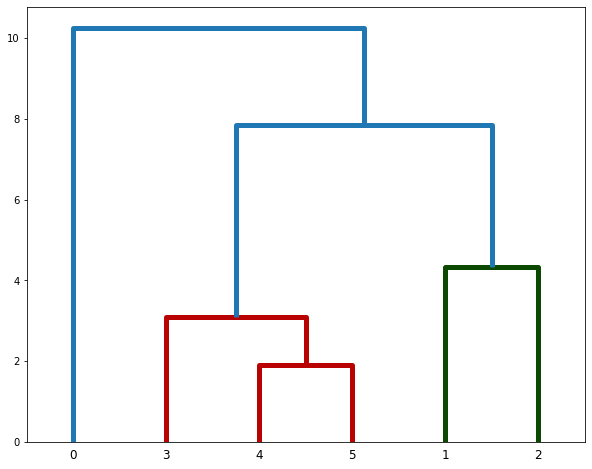

In [15]:
colors = ["#b90303","#0b4800","#711eb4"]
with matplotlib.rc_context({'lines.linewidth': 5,'lines.linestyle':':'}):
    set_link_color_palette(colors)
    fig,ax = plt.subplots(figsize=(10,8))
    dendr = dendrogram(link,ax=ax,color_threshold=5)
# linie kropkowane nie są

[None, None]

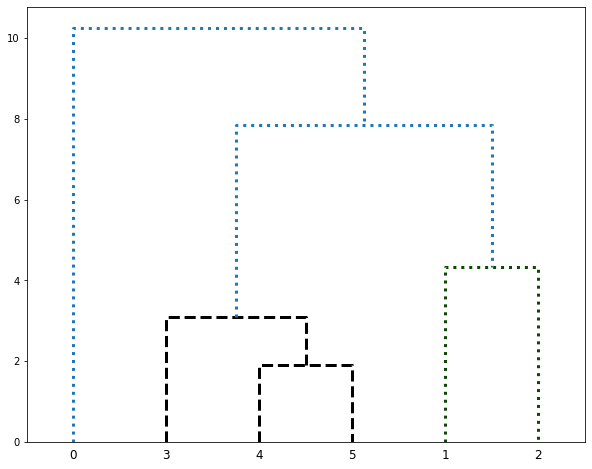

In [18]:
fig,ax = plt.subplots(figsize=(10,8))
dendr = dendrogram(link,color_threshold=5,ax=ax)
plt.setp(ax.collections,linewidth=3,linestyle=":") # cała kolekcja
plt.setp(ax.collections[0],color="#000000",linestyle="--")